In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

In [2]:
morgan = pd.read_csv("../other/emb_extraction_model_pred.csv")
morgan = morgan[morgan["Score"] > 0.5]
false_positives = morgan[(morgan["Label"] == 0) & (morgan["Pred"] == 1)]
dgidb = pd.read_csv("../data/gene_lists/DGIdb.csv", header = None)
dgidb = dgidb.iloc[3:]
dfcage = pd.read_csv("../data/gene_lists/DF_CAGE.csv")
finan = pd.read_csv("../data/components/labels/NIHMS80906-supplement-Table_S1.csv")

In [3]:
morgan_genes = set(false_positives["Gene"])
dgidb_genes = set(dgidb[0])
dfcage_genes = set(dfcage["Gene"])
finan_genes = set(finan["hgnc_names"])

In [9]:
print(f"Finan: {len(finan_genes)}, dgiDB: {len(dgidb_genes)}, DF CAGE: {len(dfcage_genes)}, Morgan FP: {len(morgan_genes)}")

Finan: 4464, dgiDB: 3952, DF CAGE: 304, Morgan FP: 954


In [4]:
len(morgan_genes & dgidb_genes & dfcage_genes & finan_genes)

3

In [5]:
len(morgan_genes & dgidb_genes)

659

In [6]:
len(morgan_genes & dfcage_genes)

3

In [7]:
len(morgan_genes & finan_genes)

715

In [69]:
morgan = morgan[morgan["Score"] > 0.5]

In [70]:
len(dfcage_genes)

304

In [62]:
len(dgidb_genes & dfcage_genes)

98

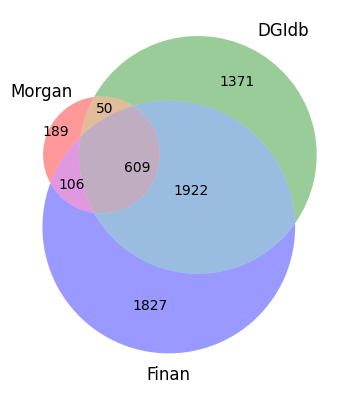

In [86]:
venn3([morgan_genes, dgidb_genes, finan_genes],
      set_labels = ("Morgan", "DGIdb", "Finan"))

plt.show()

656 genes overlap between Morgan and dgidb. 106 between morgan and finan. 609 overlap between all three. Unfortunately mdmni-dgd does not provide list of genes so cannot be used for comparison.

,Gene,Cancer,Source
0,RBM10,Lung adenocarcinoma,The role of RBM10 mutations in the development...
1,TGIF1,Lung cancer,TGIF1 promoted the growth and migration of can...
2,PTPDC1,Non,Non
3,PTPN11,Melanoma,PTPN11 Plays Oncogenic Roles and Is a Therapeu...
4,EPHA2,"Breast cancer, lung cancer, glioblastoma, and ...",Oncogenic functions and therapeutic targeting ...
...,...,...,...
299,KRT5,Non,Non
300,ZNF507,Non,Non
301,PTMA,Non,Non
302,PSIP1,Non,Non


In [75]:
dgidb

,0,1,2,3,4,5,6,7,8
3,A2M,2,NCI,NaN,COBALT,COBALT,NaN,NaN,NaN
4,AADAT,51166,TTD,NaN,"US10065972, Example 281","US10065972, Example 281",NaN,NaN,NaN
5,AAK1,22848,GuideToPharmacology,inhibitor,223366123,BARICITINIB,BARICITINIB,chembl:CHEMBL2105759,7.96
6,AANAT,15,NCI,NaN,FLUOXETINE,FLUOXETINE,FLUOXETINE,chembl:CHEMBL41,1.41
7,ABAT,18,PharmGKB,NaN,valproic acid,valproic acid,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
3950,ZNF804A,91752,PharmGKB,NaN,antipsychotics,antipsychotics,NaN,NaN,NaN
3951,ZNF816,125893,PharmGKB,NaN,Tumor necrosis factor alpha (TNF-alpha) inhibi...,Tumor necrosis factor alpha (TNF-alpha) inhibi...,NaN,NaN,NaN
3952,ZRSR2,8233,OncoKB,NaN,H3B-8800,H3B-8800,NaN,NaN,NaN
3953,ZSCAN25,221785,PharmGKB,NaN,lumefantrine,lumefantrine,LUMEFANTRINE,chembl:CHEMBL38827,5.3


In [76]:
morgan_genes & dfcage_genes

{'CHRNB2', 'EPHA2', 'EPHX1', 'MC3R', 'NTRK2', 'PRSS1', 'RXRA'}